Identifying License Plates


In [ ]:

import tensorflow as tf
from tensorflow.python.client import device_lib
import cv2
import os
import numpy as np
from imutils import paths
from random import randint

# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import add

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l1_l2

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import InputLayer




## Preprocessing

In [ ]:

# image preprocessor
class SimpleImagePreprocessor:
    def __init__(self, width, height, cWidth = 0, cHeight = 0, cropAugment = 1, interpolation = cv2.INTER_AREA):
        # store target image width, height, and interpolation method for resizing
        self.width = width
        self.height = height
        self.cWidth = cWidth
        self.cHeight = cHeight
        self.interpolation = interpolation
        self.cropAugment = cropAugment
        self.translationAugment = 0
        
    def resize(self, image):
        # resize to a fixed size ignoring aspect ratio
        return [cv2.resize(image, (self.width, self.height), interpolation = self.interpolation)]
    
    # randomly crop an image nAugment times and return each
    def randomCrop(self, image):
        images = []
        
        image = image[0]
        
        # iterate from 0 to nAugment
        for counter in np.arange(0, self.cropAugment):
            # choose a random coordinates for the lower left corner of the image
            lowerLeftX = randint(0, self.width - self.cWidth)
            lowerLeftY = randint(0, self.height - self.cHeight)
            
            # crop the image from the random point to the specified size and append to a list of images
            images.append(image[lowerLeftY:lowerLeftY + self.cHeight, lowerLeftX:lowerLeftX + self.cWidth])
            
        # return the randomly cropped images
        return images
    
    def translate(self, image, pixels = 2):        
        # translate left, right, up, and down
        leftImage = np.roll(image, pixels)
        rightImage = np.roll(image, -pixels)
        upImage = np.roll(image, pixels, axis = 0)
        downImage = np.roll(image, -pixels, axis = 0)
        
        images = [image, leftImage, rightImage, upImage, downImage]
                
        # return images translated in each direction
        return images
        
# image dataset loader
class SimpleImageDatasetLoader:
    def __init__(self, cropAugment = 1, preprocessors = None):
        self.cropAugment = cropAugment
        self.translationAugment = 0
        
        # store the image preprocessor
        self.preprocessors = preprocessors
        
        # if there are no preprocessors, initialize as an empty list
        if self.preprocessors is None:
            self.preprocessors = []
            
        # if preprocessor.translate in self.preprocessors:
        #     self.translationAugment = 4
            
    def load(self, imagePaths, verbose = -1, bw = 0):
        # initialize the list of features and labels
        data = []
        labels = []
        
        
        # loop over the input images
        for (i, imagePath) in enumerate(imagePaths):
            # load an image and extract the class label from the path
            if bw == 1:
                image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
            else:
                image = cv2.imread(imagePath)
            
            # if there are image preprocessors, apply them to the image
            if self.preprocessors is not None:
                
                # loop over the preprocessors
                for p in self.preprocessors:                    
                    # apply the preprocessor
                    image = p(image)
            
            #print(imagePath)
            label = imagePath.split(os.path.sep)[-2]
            label = (self.cropAugment + self.translationAugment) * [label]
            
            # save the data and labels
            data.extend(image)
            labels.extend(label)
                        
            # give some updates on the preprocessing
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print('[INFO] processed {}/{}'.format(i + 1, len(imagePaths)))
                
        # return the data and labels in numpy arrays
        return (np.array(data), np.array(labels))

In [ ]:

path = 'archive43'

imagePaths = list(paths.list_images(path))

# chose the size for the image
preprocessor5 = SimpleImagePreprocessor(64, 64)

# initialize the data loader
dataLoader = SimpleImageDatasetLoader(1, preprocessors = [preprocessor5.resize])

# load the data into lists
trainX, trainY = dataLoader.load(imagePaths, verbose = 100)



[INFO] processed 100/2193
[INFO] processed 200/2193
[INFO] processed 300/2193
[INFO] processed 400/2193
[INFO] processed 500/2193
[INFO] processed 600/2193
[INFO] processed 700/2193
[INFO] processed 800/2193
[INFO] processed 900/2193
[INFO] processed 1000/2193
[INFO] processed 1100/2193
[INFO] processed 1200/2193
[INFO] processed 1300/2193
[INFO] processed 1400/2193
[INFO] processed 1500/2193
[INFO] processed 1600/2193
[INFO] processed 1700/2193
[INFO] processed 1800/2193
[INFO] processed 1900/2193
[INFO] processed 2000/2193
[INFO] processed 2100/2193


In [ ]:
labels = trainY
pictures = trainX

2193


In [ ]:
trainY = labels
trainX = pictures

In [ ]:
statesf = open('states.txt', 'r')
temp = []


states = {}
counter = 0
for state in statesf:
    state = state.strip()
    states[state] = counter
    counter += 1

print(states)

for state in trainY:
    temp.append(states[state])
for i in range(0, 1000, 100):   
    print(temp[i])
statesf.close()

{'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'Florida': 8, 'Georgia': 9, 'Hawaii': 10, 'Idaho': 11, 'Illinois': 12, 'Indiana': 13, 'Iowa': 14, 'Kansas': 15, 'Kentucky': 16, 'Louisiana': 17, 'Maine': 18, 'Maryland': 19, 'Massachusetts': 20, 'Michigan': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Montana': 25, 'Nebraska': 26, 'Nevada': 27, 'NewHampshire': 28, 'NewJersey': 29, 'NewMexico': 30, 'NewYork': 31, 'NorthCarolina': 32, 'NorthDakota': 33, 'Ohio': 34, 'Oklahoma': 35, 'Oregon': 36, 'Pennsylvania': 37, 'RhodeIsland': 38, 'SouthCarolina': 39, 'SouthDakota': 40, 'Tennessee': 41, 'Texas': 42, 'Utah': 43, 'Vermont': 44, 'Virginia': 45, 'Washington': 46, 'WashingtonDC': 47, 'WestVirginia': 48, 'Wisconsin': 49, 'Wyoming': 50}
50
48
46
44
41
38
37
34
29
33


In [ ]:
trainY = temp

### Normalize trainX and set trainY to categorical

In [ ]:
trainX = trainX.astype('float32')/255.0

trainY = to_categorical(trainY, 51)

In [ ]:
print(trainX.shape)

(2193, 64, 64, 3)


### Making sure each state has the same amount of images

In [ ]:
folder_amount = [[] for i in range(51)]

for i, thing in enumerate(labels):
    folder_amount[states[thing]].append(trainX[i])
    
for i in range(51):
    print(len(folder_amount[i]))

43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43


In [ ]:
defaultX = trainX
defaultY = trainY


In [ ]:
trainX = defaultX
trainY = defaultY

In [ ]:
trainX, testX, trainY, testY = train_test_split(trainX, trainY, test_size = .2)

## LeNetReg Relu


In [ ]:
class LeNetReg:
    # create the architecture
    def build(height, width, depth, classes, lam1 = 0, lam2 = 0, dropout = [0, 0, 0, 0.5]):
        # create a feedforward neural net
        model = Sequential()

        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth),
                         kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[0]))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[1]))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('relu'))
        model.add(Dropout(dropout[2]))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        model.add(Dropout(dropout[3]))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

### Baseline Model for LeNegReg model


In [ ]:
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
model = LeNetReg.build(64, 64, 3, 51)

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])

maxIt = 50
batch_size_total = 15
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=1)

Epoch 1/50
116/116 [==============================] - 4s 32ms/step - loss: 3.9355 - accuracy: 0.0247
Epoch 2/50
116/116 [==============================] - 4s 31ms/step - loss: 3.9226 - accuracy: 0.0288
Epoch 3/50
116/116 [==============================] - 4s 31ms/step - loss: 3.9037 - accuracy: 0.0357
Epoch 4/50
116/116 [==============================] - 4s 31ms/step - loss: 3.8797 - accuracy: 0.0449
Epoch 5/50
116/116 [==============================] - 4s 31ms/step - loss: 3.8604 - accuracy: 0.0431
Epoch 6/50
116/116 [==============================] - 4s 30ms/step - loss: 3.8349 - accuracy: 0.0610
Epoch 7/50
116/116 [==============================] - 4s 31ms/step - loss: 3.8077 - accuracy: 0.0725
Epoch 8/50
116/116 [==============================] - 4s 30ms/step - loss: 3.7736 - accuracy: 0.0840
Epoch 9/50
116/116 [==============================] - 4s 31ms/step - loss: 3.7218 - accuracy: 0.0966
Epoch 10/50
116/116 [==============================] - 4s 30ms/step - loss: 3.6734 - accura

### Getting a starting L1 and L2 for our LeNetReg model with relu activation

In [ ]:
best_hyperparameters = [0, 0]
best_accuracy = 0

shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
maxIt = 20
batch_size_total = 20

for l1 in [0, 0.1, 1, 5]:
    for l2 in [0, 0.1, 1, 5]:

        model = LeNetReg.build(64, 64, 3, 51, l1, l2)
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


        H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 0)
        dev_accuracy = model.evaluate(x = trainX, y = trainY, return_dict=True)

        print('Dev accuracy for l1 =', l1, ', l2 =', l2, 'is', dev_accuracy['accuracy'])

        if dev_accuracy['accuracy'] > best_accuracy: 
            best_hyperparameters = [l1, l2]
            best_accuracy = dev_accuracy['accuracy']


55/55 [==============================] - 1s 10ms/step - loss: 1.2449 - accuracy: 0.7047
Dev accuracy for l1 = 0 , l2 = 0 is 0.704675018787384
55/55 [==============================] - 1s 12ms/step - loss: 3.9285 - accuracy: 0.0234
Dev accuracy for l1 = 0 , l2 = 0.1 is 0.023375142365694046
55/55 [==============================] - 1s 12ms/step - loss: 3.9284 - accuracy: 0.0234
Dev accuracy for l1 = 0 , l2 = 1 is 0.023375142365694046
55/55 [==============================] - 1s 10ms/step - loss: 3.9285 - accuracy: 0.0234
Dev accuracy for l1 = 0 , l2 = 5 is 0.023375142365694046
55/55 [==============================] - 1s 12ms/step - loss: 7.1088 - accuracy: 0.0234
Dev accuracy for l1 = 0.1 , l2 = 0 is 0.023375142365694046
55/55 [==============================] - 1s 10ms/step - loss: 7.0120 - accuracy: 0.0234
Dev accuracy for l1 = 0.1 , l2 = 0.1 is 0.023375142365694046
55/55 [==============================] - 1s 11ms/step - loss: 7.3234 - accuracy: 0.0234
Dev accuracy for l1 = 0.1 , l2 = 1 is

In [ ]:
best_hyperparameters

[0, 0]

### Finding the starting dropout rate for our LeNetReg with relu

In [ ]:
tf.keras.backend.clear_session()
best_dropout = 0
best_accuracy = 0
batch_size_total = 20
for dropout in [[0.1, 0.1, 0.1, 0.5], [0.2, 0.2, 0.2, 0.5], [0.5, 0.5, 0.5, 0.5], [0.75, 0.75, 0.75, 0.75]]:
        
    model = LeNetReg.build(64, 64, 3, 51, best_hyperparameters[0], best_hyperparameters[1], dropout = dropout)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    maxIt = 20
    H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=0)
    dev_accuracy = model.evaluate(x = trainX, y = trainY, return_dict=True)
    print('Dev accuracy for dropout percentages', dropout, 'is', dev_accuracy['accuracy'])
    if dev_accuracy['accuracy'] > best_accuracy: 
        best_dropout = dropout
        best_accuracy = dev_accuracy['accuracy']

55/55 [==============================] - 1s 11ms/step - loss: 3.4130 - accuracy: 0.1454
Dev accuracy for dropout percentages [0.1, 0.1, 0.1, 0.5] is 0.14538198709487915
55/55 [==============================] - 1s 10ms/step - loss: 3.3450 - accuracy: 0.2286
Dev accuracy for dropout percentages [0.2, 0.2, 0.2, 0.5] is 0.22862029075622559
55/55 [==============================] - 1s 11ms/step - loss: 3.9284 - accuracy: 0.0234
Dev accuracy for dropout percentages [0.5, 0.5, 0.5, 0.5] is 0.023375142365694046
55/55 [==============================] - 1s 10ms/step - loss: 3.8774 - accuracy: 0.0485
Dev accuracy for dropout percentages [0.75, 0.75, 0.75, 0.75] is 0.04846066236495972


In [ ]:
best_dropout

[0.2, 0.2, 0.2, 0.5]

### Taking the best hyperparameters from the initial testing we trained a model for more iterations

In [ ]:

shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
model = LeNetReg.build(64, 64, 3, 51, best_hyperparameters[0], best_hyperparameters[1], dropout=best_dropout)

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])

maxIt = 50
batch_size_total = 20
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=1)

Epoch 1/50
87/87 [==============================] - 4s 36ms/step - loss: 3.9400 - accuracy: 0.0167
Epoch 2/50
87/87 [==============================] - 3s 36ms/step - loss: 3.9317 - accuracy: 0.0208
Epoch 3/50
87/87 [==============================] - 3s 36ms/step - loss: 3.9285 - accuracy: 0.0248
Epoch 4/50
87/87 [==============================] - 3s 35ms/step - loss: 3.9237 - accuracy: 0.0294
Epoch 5/50
87/87 [==============================] - 3s 36ms/step - loss: 3.9183 - accuracy: 0.0352
Epoch 6/50
87/87 [==============================] - 3s 36ms/step - loss: 3.9111 - accuracy: 0.0311
Epoch 7/50
87/87 [==============================] - 3s 37ms/step - loss: 3.8905 - accuracy: 0.0340
Epoch 8/50
87/87 [==============================] - 3s 36ms/step - loss: 3.8670 - accuracy: 0.0433
Epoch 9/50
87/87 [==============================] - 3s 36ms/step - loss: 3.8588 - accuracy: 0.0542
Epoch 10/50
87/87 [==============================] - 3s 36ms/step - loss: 3.8329 - accuracy: 0.0513
Epoch 11/

### We took the best model from LeNetReg relu model and adjusted the 4th dropout to .2 to match the other three layers

In [ ]:
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
model = LeNetReg.build(64, 64, 3, 51, 0, 0, dropout=[0.2,0.2,0.2,0.2])

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])

maxIt = 50
batch_size_total = 20
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=1)

Epoch 1/50
87/87 [==============================] - 3s 24ms/step - loss: 3.9405 - accuracy: 0.0196
Epoch 2/50
87/87 [==============================] - 2s 24ms/step - loss: 3.9277 - accuracy: 0.0271
Epoch 3/50
87/87 [==============================] - 2s 24ms/step - loss: 3.9146 - accuracy: 0.0306
Epoch 4/50
87/87 [==============================] - 2s 24ms/step - loss: 3.8966 - accuracy: 0.0340
Epoch 5/50
87/87 [==============================] - 2s 23ms/step - loss: 3.8617 - accuracy: 0.0404
Epoch 6/50
87/87 [==============================] - 2s 23ms/step - loss: 3.8495 - accuracy: 0.0421
Epoch 7/50
87/87 [==============================] - 2s 24ms/step - loss: 3.8227 - accuracy: 0.0582
Epoch 8/50
87/87 [==============================] - 2s 24ms/step - loss: 3.8008 - accuracy: 0.0709
Epoch 9/50
87/87 [==============================] - 2s 24ms/step - loss: 3.7663 - accuracy: 0.0692
Epoch 10/50
87/87 [==============================] - 2s 24ms/step - loss: 3.7271 - accuracy: 0.0905
Epoch 11/

### In this model we expiremented with changing the learning rate to .1 which is a bit more aggressive. We also decided to keep the 4th dropout at .2 as we saw greater accuracy in this model than the last.

In [ ]:
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
model = LeNetReg.build(64, 64, 3, 51, 0, 0, dropout=[0.2,0.2,0.2,0.2])

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.1), metrics = ['accuracy'])

maxIt = 50
batch_size_total = 20
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=1)

Epoch 1/50
87/87 [==============================] - 3s 24ms/step - loss: 3.9359 - accuracy: 0.0185
Epoch 2/50
87/87 [==============================] - 2s 24ms/step - loss: 3.9339 - accuracy: 0.0202
Epoch 3/50
87/87 [==============================] - 2s 23ms/step - loss: 3.9293 - accuracy: 0.0225
Epoch 4/50
87/87 [==============================] - 2s 24ms/step - loss: 3.9333 - accuracy: 0.0196
Epoch 5/50
87/87 [==============================] - 2s 23ms/step - loss: 3.9286 - accuracy: 0.0213
Epoch 6/50
87/87 [==============================] - 2s 24ms/step - loss: 3.9336 - accuracy: 0.0271
Epoch 7/50
87/87 [==============================] - 2s 23ms/step - loss: 3.9253 - accuracy: 0.0271
Epoch 8/50
87/87 [==============================] - 2s 24ms/step - loss: 3.9328 - accuracy: 0.0213
Epoch 9/50
87/87 [==============================] - 2s 24ms/step - loss: 3.9169 - accuracy: 0.0311
Epoch 10/50
87/87 [==============================] - 2s 24ms/step - loss: 3.8957 - accuracy: 0.0293
Epoch 11/

### .1 learning rate seemed to be a bit to high so we decided to scale it down some it .05

In [ ]:
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
model = LeNetReg.build(64, 64, 3, 51, 0, 0, dropout=[0.2,0.2,0.2,0.2])

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.05), metrics = ['accuracy'])

maxIt = 50
batch_size_total = 20
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=1)

Epoch 1/50
87/87 [==============================] - 3s 24ms/step - loss: 3.9355 - accuracy: 0.0219
Epoch 2/50
87/87 [==============================] - 2s 23ms/step - loss: 3.9106 - accuracy: 0.0311
Epoch 3/50
87/87 [==============================] - 2s 23ms/step - loss: 3.8789 - accuracy: 0.0525
Epoch 4/50
87/87 [==============================] - 2s 24ms/step - loss: 3.8551 - accuracy: 0.0525
Epoch 5/50
87/87 [==============================] - 2s 24ms/step - loss: 3.8304 - accuracy: 0.0669
Epoch 6/50
87/87 [==============================] - 2s 24ms/step - loss: 3.7516 - accuracy: 0.0957
Epoch 7/50
87/87 [==============================] - 2s 23ms/step - loss: 3.6308 - accuracy: 0.1171
Epoch 8/50
87/87 [==============================] - 2s 23ms/step - loss: 3.5376 - accuracy: 0.1407
Epoch 9/50
87/87 [==============================] - 2s 24ms/step - loss: 3.5465 - accuracy: 0.1321
Epoch 10/50
87/87 [==============================] - 2s 24ms/step - loss: 3.3742 - accuracy: 0.1626
Epoch 11/

In [ ]:
model.evaluate(x = trainX, y = trainY, return_dict = 1)

55/55 [==============================] - 1s 11ms/step - loss: 0.6085 - accuracy: 0.8569


{'accuracy': 0.8568985462188721, 'loss': 0.6085496544837952}

## LeNetReg Elu
### Baseline model for our LeNetReg model with elu

In [ ]:
class LeNetReg:
    # create the architecture
    def build(height, width, depth, classes, lam1 = 0, lam2 = 0, dropout = [0, 0, 0, 0.5]):
        # create a feedforward neural net
        model = Sequential()
        
        # add a convolutional layer with 20 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = (height, width, depth),
                         kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('elu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[0]))
        
        # add another convolutional layer with 50 5x5 filters and a 2x2 max pooling layer
        model.add(Conv2D(64, (5, 5), padding= 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('elu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(dropout[1]))
        
        # add another convolutional layer
        model.add(Conv2D(128, (5, 5), padding = 'same', kernel_regularizer = l1_l2(l1 = lam1, l2 = lam2)))
        model.add(Activation('elu'))
        model.add(Dropout(dropout[2]))
        
        # add a fully-connected layer
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('elu'))
        
        model.add(Dropout(dropout[3]))
        
        # add a softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the constructed model
        return model

### We decided to try test smaller L1 and L2s with elu becuase we noticed when training the relu model that bigger L1 and L2s dended to lead towards worse accuracy

In [ ]:
best_hyperparameters = [0, 0]
best_accuracy = 0

shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
maxIt = 20
batch_size_total = 20

for l1 in [0, 0.0001, 0.001, 0.01, 0.1]:
    for l2 in [0, 0.0001, 0.001, 0.01, 0.1]:

        model = LeNetReg.build(64, 64, 3, 51, l1, l2)
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


        H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), 
                      steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 0)
        dev_accuracy = model.evaluate(x = trainX, y = trainY, return_dict=True)

        print('Dev accuracy for l1 =', l1, ', l2 =', l2, 'is', dev_accuracy['accuracy'])

        if dev_accuracy['accuracy'] > best_accuracy: 
            best_hyperparameters = [l1, l2]
            best_accuracy = dev_accuracy['accuracy']


55/55 [==============================] - 1s 11ms/step - loss: 0.0611 - accuracy: 0.9823
Dev accuracy for l1 = 0 , l2 = 0 is 0.982326090335846
55/55 [==============================] - 1s 12ms/step - loss: 0.2383 - accuracy: 0.9379
Dev accuracy for l1 = 0 , l2 = 0.0001 is 0.9378563165664673
55/55 [==============================] - 1s 11ms/step - loss: 0.4074 - accuracy: 0.9384
Dev accuracy for l1 = 0 , l2 = 0.001 is 0.9384264349937439
55/55 [==============================] - 1s 11ms/step - loss: 0.9528 - accuracy: 0.9726
Dev accuracy for l1 = 0 , l2 = 0.01 is 0.972633957862854
55/55 [==============================] - 1s 11ms/step - loss: 1.8818 - accuracy: 0.8153
Dev accuracy for l1 = 0 , l2 = 0.1 is 0.8152793645858765
55/55 [==============================] - 1s 11ms/step - loss: 0.7192 - accuracy: 0.9515
Dev accuracy for l1 = 0.0001 , l2 = 0 is 0.9515393376350403
55/55 [==============================] - 1s 11ms/step - loss: 0.7662 - accuracy: 0.9458
Dev accuracy for l1 = 0.0001 , l2 = 0

In [ ]:
tf.keras.backend.clear_session()
best_dropout = 0
best_accuracy = 0
batch_size_total = 20
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
for dropout in [[0.1, 0.1, 0.1, 0.5], [0.2, 0.2, 0.2, 0.5], [0.5, 0.5, 0.5, 0.5], [0.75, 0.75, 0.75, 0.75]]:
        
    model = LeNetReg.build(64, 64, 3, 51, 0, 0, dropout = dropout)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    maxIt = 20
    H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=0)
    dev_accuracy = model.evaluate(x = trainX, y = trainY, return_dict=True)
    print('Dev accuracy for dropout percentages', dropout, 'is', dev_accuracy['accuracy'])
    if dev_accuracy['accuracy'] > best_accuracy: 
        best_dropout = dropout
        best_accuracy = dev_accuracy['accuracy']


55/55 [==============================] - 0s 5ms/step - loss: 0.1868 - accuracy: 0.9436
Dev accuracy for dropout percentages [0.1, 0.1, 0.1, 0.5] is 0.9435575604438782
55/55 [==============================] - 0s 5ms/step - loss: 0.1280 - accuracy: 0.9647
Dev accuracy for dropout percentages [0.2, 0.2, 0.2, 0.5] is 0.9646522402763367
55/55 [==============================] - 0s 5ms/step - loss: 0.6456 - accuracy: 0.8170
Dev accuracy for dropout percentages [0.5, 0.5, 0.5, 0.5] is 0.8169897198677063
55/55 [==============================] - 0s 5ms/step - loss: 3.2568 - accuracy: 0.3067
Dev accuracy for dropout percentages [0.75, 0.75, 0.75, 0.75] is 0.30672746896743774


In [ ]:
best_dropout

[0.2, 0.2, 0.2, 0.5]

In [ ]:
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
model = LeNetReg.build(64, 64, 3, 51, 0, 0, dropout=[0.2, 0.2, 0.2, 0.5])

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])

maxIt = 50
batch_size_total = 20
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=1)

Epoch 1/50
87/87 [==============================] - 3s 24ms/step - loss: 3.9590 - accuracy: 0.0248
Epoch 2/50
87/87 [==============================] - 2s 23ms/step - loss: 3.8442 - accuracy: 0.0600
Epoch 3/50
87/87 [==============================] - 2s 23ms/step - loss: 3.7530 - accuracy: 0.0842
Epoch 4/50
87/87 [==============================] - 2s 23ms/step - loss: 3.6658 - accuracy: 0.1171
Epoch 5/50
87/87 [==============================] - 2s 26ms/step - loss: 3.5553 - accuracy: 0.1338
Epoch 6/50
87/87 [==============================] - 2s 23ms/step - loss: 3.4282 - accuracy: 0.1696
Epoch 7/50
87/87 [==============================] - 2s 24ms/step - loss: 3.2918 - accuracy: 0.2128
Epoch 8/50
87/87 [==============================] - 2s 23ms/step - loss: 3.1683 - accuracy: 0.2416
Epoch 9/50
87/87 [==============================] - 2s 23ms/step - loss: 3.0263 - accuracy: 0.2630
Epoch 10/50
87/87 [==============================] - 2s 23ms/step - loss: 2.9163 - accuracy: 0.2832
Epoch 11/

In [ ]:
model.evaluate(x = trainX, y = trainY, return_dict = 1)

55/55 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000


{'accuracy': 1.0, 'loss': 0.0039517139084637165}

### The best L1 and L2 are the same for the Relu model so we decided to use the variables from it to train this model

In [ ]:
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
model = LeNetReg.build(64, 64, 3, 51, 0, 0, dropout=[0.2, 0.2, 0.2, 0.2])

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.05), metrics = ['accuracy'])

maxIt = 50
batch_size_total = 20
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total),
              steps_per_epoch=len(trainX) // batch_size_total, epochs=maxIt, verbose=1)

Epoch 1/50
87/87 [==============================] - 3s 24ms/step - loss: nan - accuracy: 0.0179
Epoch 2/50
87/87 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.0208
Epoch 3/50
87/87 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.0202
Epoch 4/50
87/87 [==============================] - 2s 23ms/step - loss: nan - accuracy: 0.0208
Epoch 5/50
87/87 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.0208
Epoch 6/50
87/87 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.0208
Epoch 7/50
87/87 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.0208
Epoch 8/50
87/87 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.0208
Epoch 9/50
87/87 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.0208
Epoch 10/50
87/87 [==============================] - 2s 24ms/step - loss: nan - accuracy: 0.0202
Epoch 11/50
87/87 [====================

### Based on these results with LeNetReg Elu, we have decided to move on to a different model

## VGGNet16


In [ ]:
class VGGNet16:
    def build(height, width, depth, classes):
        model = Sequential(name = 'VGGNet16')
        
        # conv 1
        model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (height, width, depth)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 2
        model.add(Conv2D(64, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 3
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 4
        model.add(Conv2D(128, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 5
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 6
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 7
        model.add(Conv2D(256, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 8
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 9
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 10
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        # conv 11
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 12
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # conv 13
        model.add(Conv2D(512, (3, 3), padding = 'same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        
        # pool
        model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
        model.add(Dropout(0.25))
        
        model.add(Flatten())
        
        # fc 14
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 15
        model.add(Dense(4096))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # fc 16
        model.add(Dense(1000))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        
        # return the model
        return model

### Baseline test for VGGNet16

In [ ]:
model = VGGNet16.build(64, 64, 3, 51)
opt = SGD(.01)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
batch_size_total = 20
maxIt = 50
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), batch_size = batch_size_total, epochs = maxIt, verbose = 1)

Epoch 1/50
88/88 [==============================] - 6s 38ms/step - loss: 5.4966 - accuracy: 0.0274
Epoch 2/50
88/88 [==============================] - 3s 34ms/step - loss: 5.3610 - accuracy: 0.0325
Epoch 3/50
88/88 [==============================] - 3s 34ms/step - loss: 5.0698 - accuracy: 0.0359
Epoch 4/50
88/88 [==============================] - 3s 34ms/step - loss: 4.8562 - accuracy: 0.0353
Epoch 5/50
88/88 [==============================] - 3s 34ms/step - loss: 4.8480 - accuracy: 0.0365
Epoch 6/50
88/88 [==============================] - 3s 34ms/step - loss: 4.7268 - accuracy: 0.0479
Epoch 7/50
88/88 [==============================] - 3s 34ms/step - loss: 4.6480 - accuracy: 0.0439
Epoch 8/50
88/88 [==============================] - 3s 34ms/step - loss: 4.5392 - accuracy: 0.0456
Epoch 9/50
88/88 [==============================] - 3s 35ms/step - loss: 4.4785 - accuracy: 0.0496
Epoch 10/50
88/88 [==============================] - 3s 34ms/step - loss: 4.4538 - accuracy: 0.0542
Epoch 11/

### Finding the best learning rate

In [ ]:
tf.keras.backend.clear_session()
best_learning_rate = 0
best_accuracy = 0
batch_size_total = 20
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")


for i in [.01, .02, .05, .1]:
    model = VGGNet16.build(64, 64, 3, 51)
    opt = SGD(learning_rate = i, decay = 0.3 / 100, nesterov = True)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    maxIt = 20
    H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), 
                  batch_size = batch_size_total, epochs = maxIt, verbose = 0)
    dev_accuracy = model.evaluate(x = trainX, y = trainY, return_dict=True)
    print('Dev accuracy for learning rate ', i, 'is', dev_accuracy['accuracy'])
    if dev_accuracy['accuracy'] > best_accuracy: 
        best_learning_rate = i
        best_accuracy = dev_accuracy['accuracy']




55/55 [==============================] - 2s 17ms/step - loss: 3.4336 - accuracy: 0.1380
Dev accuracy for learning rate  0.01 is 0.13797035813331604
55/55 [==============================] - 1s 13ms/step - loss: 3.4166 - accuracy: 0.1442
Dev accuracy for learning rate  0.02 is 0.14424173533916473
55/55 [==============================] - 1s 12ms/step - loss: 3.6357 - accuracy: 0.1129
Dev accuracy for learning rate  0.05 is 0.11288483440876007
55/55 [==============================] - 1s 12ms/step - loss: 3.7885 - accuracy: 0.1129
Dev accuracy for learning rate  0.1 is 0.11288483440876007


In [ ]:
best_learning_rate

0.02

### Finding the best momentum

In [ ]:
tf.keras.backend.clear_session()
best_momentum = 0
best_accuracy = 0
batch_size_total = 20
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")


for i in [.1, .2, .5, .9]:
    model = VGGNet16.build(64, 64, 3, 51)
    opt = SGD(learning_rate = best_learning_rate, decay = 0.3 / 100, momentum = i, nesterov = True)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    maxIt = 20
    H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), 
                  batch_size = batch_size_total, epochs = maxIt, verbose = 0)
    dev_accuracy = model.evaluate(x = trainX, y = trainY, return_dict=True)
    print('Dev accuracy for a momentum of ', i, 'is', dev_accuracy['accuracy'])
    if dev_accuracy['accuracy'] > best_accuracy: 
        best_momentum = i
        best_accuracy = dev_accuracy['accuracy']

### model with the best hyperparameters all in it

In [ ]:
model = VGGNet16.build(64, 64, 3, 51)
opt = opt = SGD(learning_rate = best_learning_rate, decay = 0.3 / 100, momentum = best_momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
batch_size_total = 20
maxIt = 50
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 1)

Epoch 1/50
87/87 [==============================] - 5s 35ms/step - loss: 5.4478 - accuracy: 0.0208
Epoch 2/50
87/87 [==============================] - 3s 35ms/step - loss: 5.1228 - accuracy: 0.0283
Epoch 3/50
87/87 [==============================] - 3s 35ms/step - loss: 4.9359 - accuracy: 0.0294
Epoch 4/50
87/87 [==============================] - 3s 35ms/step - loss: 4.8480 - accuracy: 0.0283
Epoch 5/50
87/87 [==============================] - 3s 35ms/step - loss: 4.7018 - accuracy: 0.0473
Epoch 6/50
87/87 [==============================] - 3s 35ms/step - loss: 4.6486 - accuracy: 0.0283
Epoch 7/50
87/87 [==============================] - 3s 35ms/step - loss: 4.5806 - accuracy: 0.0421
Epoch 8/50
87/87 [==============================] - 3s 35ms/step - loss: 4.5300 - accuracy: 0.0490
Epoch 9/50
87/87 [==============================] - 3s 35ms/step - loss: 4.4686 - accuracy: 0.0421
Epoch 10/50
87/87 [==============================] - 3s 35ms/step - loss: 4.5472 - accuracy: 0.0381
Epoch 11/

### Here we took the best model and brough the decay down to 0.1/100

In [ ]:
model = VGGNet16.build(64, 64, 3, 51)
opt = opt = SGD(learning_rate = best_learning_rate, decay = 0.1 / 100, momentum = best_momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
batch_size_total = 20
maxIt = 50
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 1)

Epoch 1/50
87/87 [==============================] - 6s 39ms/step - loss: 7.0403 - accuracy: 0.0190
Epoch 2/50
87/87 [==============================] - 3s 36ms/step - loss: 6.7606 - accuracy: 0.0242
Epoch 3/50
87/87 [==============================] - 3s 35ms/step - loss: 6.2575 - accuracy: 0.0283
Epoch 4/50
87/87 [==============================] - 3s 35ms/step - loss: 6.1700 - accuracy: 0.0288
Epoch 5/50
87/87 [==============================] - 3s 36ms/step - loss: 5.7848 - accuracy: 0.0329
Epoch 6/50
87/87 [==============================] - 3s 35ms/step - loss: 5.6603 - accuracy: 0.0311
Epoch 7/50
87/87 [==============================] - 3s 35ms/step - loss: 5.5354 - accuracy: 0.0381
Epoch 8/50
87/87 [==============================] - 3s 36ms/step - loss: 5.3701 - accuracy: 0.0334
Epoch 9/50
87/87 [==============================] - 3s 36ms/step - loss: 5.2381 - accuracy: 0.0323
Epoch 10/50
87/87 [==============================] - 3s 35ms/step - loss: 5.0776 - accuracy: 0.0340
Epoch 11/

### We saw roughly the same accuracy with the decay lowered to 0.1/100 so we decided to go the other way and raise it to 0.5/100

In [ ]:
model = VGGNet16.build(64, 64, 3, 51)
opt = opt = SGD(learning_rate = best_learning_rate, decay = 0.5 / 100, momentum = best_momentum, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
batch_size_total = 20
maxIt = 50
H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 1)

Epoch 1/50
87/87 [==============================] - 5s 36ms/step - loss: 6.5450 - accuracy: 0.0196
Epoch 2/50
87/87 [==============================] - 3s 35ms/step - loss: 5.9360 - accuracy: 0.0213
Epoch 3/50
87/87 [==============================] - 3s 35ms/step - loss: 5.5910 - accuracy: 0.0254
Epoch 4/50
87/87 [==============================] - 3s 36ms/step - loss: 5.4118 - accuracy: 0.0208
Epoch 5/50
87/87 [==============================] - 3s 36ms/step - loss: 5.2099 - accuracy: 0.0271
Epoch 6/50
87/87 [==============================] - 3s 35ms/step - loss: 5.0568 - accuracy: 0.0346
Epoch 7/50
87/87 [==============================] - 3s 36ms/step - loss: 4.9875 - accuracy: 0.0300
Epoch 8/50
87/87 [==============================] - 3s 36ms/step - loss: 4.8886 - accuracy: 0.0438
Epoch 9/50
87/87 [==============================] - 3s 36ms/step - loss: 4.7884 - accuracy: 0.0352
Epoch 10/50
87/87 [==============================] - 3s 36ms/step - loss: 4.6562 - accuracy: 0.0363
Epoch 11/

### This model ended up not doing as well as we would have hoped with the decay change so we decided to move on to a different model

## MiniGoogLeNet

In [ ]:
class MiniGoogLeNet:
    def convolution_module(x, K, kX, kY, stride, channelsDim, padding="same"):
        # create a CONV -> BN -> RELU sequence
        x = Conv2D(K, (kX, kY), strides = stride, padding = padding)(x)
        x = BatchNormalization(axis = channelsDim)(x)
        x = Activation('relu')(x)
        
        # return the output
        return x
    
    def inception_module(x, numberOf1x1Kernels, numberOf3x3Kernels, channelsDim):
        # define two "parallel" convolutions of size 1x1 and 3x3 concatenated across the channels dimension
        convolution_1x1 = MiniGoogLeNet.convolution_module(x, numberOf1x1Kernels, 1, 1, (1, 1), channelsDim)
        convolution_3x3 = MiniGoogLeNet.convolution_module(x, numberOf3x3Kernels, 3, 3, (1, 1), channelsDim)
        x = concatenate([convolution_1x1, convolution_3x3], axis = channelsDim)
        
        return x
        
    def downsample_module(x, K, channelsDim):
        # define a CONV and POOL and then concatenate across the channels dimension
        convolution_3x3 = MiniGoogLeNet.convolution_module(x, K, 3, 3, (2, 2), channelsDim, padding = 'valid')
        pool = MaxPooling2D((3, 3), strides = (2, 2))(x)
        x = concatenate([convolution_3x3, pool], axis = channelsDim)
        
        return x
    
    def build(width, height, depth, classes):
        inputShape = (height, width, depth)
        channelsDim = -1
        
        
        # define the model input and first CONV module
        inputs = Input(shape = inputShape)
        x = MiniGoogLeNet.convolution_module(inputs, 96, 3, 3, (1, 1), channelsDim)
        
        # two inception modules followed by a downsample module
        x = MiniGoogLeNet.inception_module(x, 32, 32, channelsDim)
        x = MiniGoogLeNet.inception_module(x, 32, 48, channelsDim)
        x = MiniGoogLeNet.downsample_module(x, 80, channelsDim)
        
        # four inception modules followed by a downsample module
        x = MiniGoogLeNet.inception_module(x, 112, 48, channelsDim)
        x = MiniGoogLeNet.inception_module(x, 96, 64, channelsDim)
        x = MiniGoogLeNet.inception_module(x, 80, 80, channelsDim)
        x = MiniGoogLeNet.inception_module(x, 48, 96, channelsDim)
        x = MiniGoogLeNet.downsample_module(x, 96, channelsDim)
        
        # two inception modules followed by global POOL and dropout
        x = MiniGoogLeNet.inception_module(x, 176, 160, channelsDim)
        x = MiniGoogLeNet.inception_module(x, 176, 160, channelsDim)
        x = AveragePooling2D((7, 7))(x)
        x = Dropout(0.5)(x)
        
        # softmax classifier
        x = Flatten()(x)
        x = Dense(classes)(x)
        x = Activation('softmax')(x)
        
        # create a model
        model = Model(inputs, x, name='MiniGoogLeNet')
        
        # return the model
        return model

### Baseline model for MiniGoogLeNet

In [ ]:
maxIt = 50
initialLearningRate = 0.01
batch_size_total = 20
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
def polynomial_decay(epoch):
    maxEpochs = numberOfEpochs
    baseLearningRate = initialLearningRate
    power = 1.0
    
    alpha = baseLearningRate * (1 - (epoch / float(numberOfEpochs))) ** power
    
    # return the learning rate
    return alpha


callbacks = [LearningRateScheduler(polynomial_decay)]

opt = SGD(learning_rate = initialLearningRate, momentum=0.9)
model = MiniGoogLeNet.build(width = 64, height = 64, depth = 3, classes = 51)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=["accuracy"])

H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 1)

Epoch 1/50
87/87 [==============================] - 5s 36ms/step - loss: 4.3499 - accuracy: 0.0467
Epoch 2/50
87/87 [==============================] - 3s 35ms/step - loss: 3.9293 - accuracy: 0.0721
Epoch 3/50
87/87 [==============================] - 3s 36ms/step - loss: 3.6703 - accuracy: 0.1165
Epoch 4/50
87/87 [==============================] - 3s 36ms/step - loss: 3.5693 - accuracy: 0.1194
Epoch 5/50
87/87 [==============================] - 3s 36ms/step - loss: 3.4293 - accuracy: 0.1522
Epoch 6/50
87/87 [==============================] - 3s 36ms/step - loss: 3.3397 - accuracy: 0.1724
Epoch 7/50
87/87 [==============================] - 3s 36ms/step - loss: 3.2212 - accuracy: 0.1909
Epoch 8/50
87/87 [==============================] - 3s 36ms/step - loss: 3.1377 - accuracy: 0.2145
Epoch 9/50
87/87 [==============================] - 3s 36ms/step - loss: 3.0423 - accuracy: 0.2388
Epoch 10/50
87/87 [==============================] - 3s 36ms/step - loss: 2.9704 - accuracy: 0.2486
Epoch 11/

### This is where we tried to get a good learning rate

In [ ]:
maxIt = 100
batch_size_total = 20
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")

best_accuracy = 0
best_learning_rate = 0

def polynomial_decay(epoch):
    maxEpochs = numberOfEpochs
    baseLearningRate = initialLearningRate
    power = 1.0
    
    alpha = baseLearningRate * (1 - (epoch / float(numberOfEpochs))) ** power
    
    return alpha


callbacks = [LearningRateScheduler(polynomial_decay)]


for rate in [.01, .02, .05, .1]:

    opt = SGD(learning_rate = rate, momentum=0.9)
    model = MiniGoogLeNet.build(width = 64, height = 64, depth = 3, classes = 51)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=["accuracy"])

    H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), 
                  steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 0)
    dev_accuracy = model.evaluate(x = trainX, y = trainY, return_dict=True)
    print('Dev accuracy for learning rate ', rate, 'is', dev_accuracy['accuracy'])
    if dev_accuracy['accuracy'] > best_accuracy: 
        best_learning_rate = rate
        best_accuracy = dev_accuracy['accuracy']

55/55 [==============================] - 1s 16ms/step - loss: 0.0081 - accuracy: 0.9983
Dev accuracy for learning rate  0.01 is 0.9982896447181702
55/55 [==============================] - 1s 16ms/step - loss: 0.0241 - accuracy: 0.9937
Dev accuracy for learning rate  0.02 is 0.9937286376953125
55/55 [==============================] - 1s 16ms/step - loss: 0.0163 - accuracy: 1.0000
Dev accuracy for learning rate  0.05 is 1.0
55/55 [==============================] - 1s 16ms/step - loss: 0.0986 - accuracy: 0.9738
Dev accuracy for learning rate  0.1 is 0.973774254322052


In [ ]:
best_learning_rate

0.01

### This is where we tried to get a good momentum

In [ ]:
maxIt = 100
batch_size_total = 20
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")

best_accuracy = 0
best_momentum = 0

def polynomial_decay(epoch):
    maxEpochs = numberOfEpochs
    baseLearningRate = best_learning_rate
    power = 1.0
    
    alpha = baseLearningRate * (1 - (epoch / float(numberOfEpochs))) ** power
    
    return alpha


callbacks = [LearningRateScheduler(polynomial_decay)]


for rate in [.1, .2, .5, .9]:

    opt = SGD(learning_rate = best_learning_rate, momentum = rate)
    model = MiniGoogLeNet.build(width = 64, height = 64, depth = 3, classes = 51)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=["accuracy"])

    H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), 
                  steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 0)
    dev_accuracy = model.evaluate(x = trainX, y = trainY, return_dict=True)
    print('Dev accuracy for momentum ', rate, 'is', dev_accuracy['accuracy'])
    if dev_accuracy['accuracy'] > best_accuracy: 
        best_momentum = rate
        best_accuracy = dev_accuracy['accuracy']

55/55 [==============================] - 1s 16ms/step - loss: 0.0108 - accuracy: 0.9994
Dev accuracy for momentum  0.1 is 0.9994298815727234
55/55 [==============================] - 1s 16ms/step - loss: 0.0052 - accuracy: 0.9994
Dev accuracy for momentum  0.2 is 0.9994298815727234
55/55 [==============================] - 1s 16ms/step - loss: 0.0120 - accuracy: 0.9994
Dev accuracy for momentum  0.5 is 0.9994298815727234
55/55 [==============================] - 1s 16ms/step - loss: 0.0257 - accuracy: 0.9960
Dev accuracy for momentum  0.9 is 0.996009111404419


In [ ]:
best_momentum

0.1

### Model with the best learning rate and best momentum

In [ ]:
maxIt = 100
batch_size_total = 20
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
def polynomial_decay(epoch):
    maxEpochs = numberOfEpochs
    baseLearningRate = best_learning_rate
    power = 1.0
    
    alpha = baseLearningRate * (1 - (epoch / float(numberOfEpochs))) ** power
    
    # return the learning rate
    return alpha


callbacks = [LearningRateScheduler(polynomial_decay)]

opt = SGD(learning_rate = best_learning_rate, momentum=best_momentum)
model = MiniGoogLeNet.build(width = 64, height = 64, depth = 3, classes = 51)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=["accuracy"])

H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 1)

Epoch 1/100
87/87 [==============================] - 5s 36ms/step - loss: 4.3385 - accuracy: 0.0402
Epoch 2/100
87/87 [==============================] - 3s 35ms/step - loss: 3.9219 - accuracy: 0.0738
Epoch 3/100
87/87 [==============================] - 3s 36ms/step - loss: 3.7405 - accuracy: 0.1044
Epoch 4/100
87/87 [==============================] - 3s 36ms/step - loss: 3.5301 - accuracy: 0.1373
Epoch 5/100
87/87 [==============================] - 3s 36ms/step - loss: 3.4049 - accuracy: 0.1603
Epoch 6/100
87/87 [==============================] - 3s 36ms/step - loss: 3.2871 - accuracy: 0.1880
Epoch 7/100
87/87 [==============================] - 3s 36ms/step - loss: 3.2051 - accuracy: 0.1972
Epoch 8/100
87/87 [==============================] - 3s 36ms/step - loss: 3.0693 - accuracy: 0.2330
Epoch 9/100
87/87 [==============================] - 3s 36ms/step - loss: 2.9701 - accuracy: 0.2411
Epoch 10/100
87/87 [==============================] - 3s 36ms/step - loss: 2.8606 - accuracy: 0.2803

### Here we made the base learning rate .01

In [ ]:
maxIt = 100
batch_size_total = 20
shifts = .05
aug = ImageDataGenerator(width_shift_range = shifts, height_shift_range = shifts, fill_mode="nearest")
def polynomial_decay(epoch):
    maxEpochs = numberOfEpochs
    baseLearningRate = .01
    power = 1.0
    
    alpha = baseLearningRate * (1 - (epoch / float(numberOfEpochs))) ** power
    
    # return the learning rate
    return alpha


callbacks = [LearningRateScheduler(polynomial_decay)]

opt = SGD(learning_rate = best_learning_rate, momentum=best_momentum)
model = MiniGoogLeNet.build(width = 64, height = 64, depth = 3, classes = 51)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=["accuracy"])

H = model.fit(aug.flow(trainX, trainY, batch_size = batch_size_total), steps_per_epoch=len(trainX) // batch_size_total, epochs = maxIt, verbose = 1)

Epoch 1/100
87/87 [==============================] - 5s 36ms/step - loss: 4.2814 - accuracy: 0.0473
Epoch 2/100
87/87 [==============================] - 3s 36ms/step - loss: 3.9122 - accuracy: 0.0773
Epoch 3/100
87/87 [==============================] - 3s 36ms/step - loss: 3.6933 - accuracy: 0.1194
Epoch 4/100
87/87 [==============================] - 3s 36ms/step - loss: 3.5327 - accuracy: 0.1401
Epoch 5/100
87/87 [==============================] - 3s 36ms/step - loss: 3.3942 - accuracy: 0.1690
Epoch 6/100
87/87 [==============================] - 3s 36ms/step - loss: 3.2436 - accuracy: 0.1817
Epoch 7/100
87/87 [==============================] - 3s 36ms/step - loss: 3.1240 - accuracy: 0.2157
Epoch 8/100
87/87 [==============================] - 3s 37ms/step - loss: 3.0427 - accuracy: 0.2290
Epoch 9/100
87/87 [==============================] - 3s 36ms/step - loss: 2.9285 - accuracy: 0.2584
Epoch 10/100
87/87 [==============================] - 3s 36ms/step - loss: 2.7998 - accuracy: 0.2884

### This is our best performing model

# Final Test



 Test accuracy
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       1.00      0.50      0.67        12
           2       0.17      0.10      0.12        10
           3       1.00      0.67      0.80        12
           4       0.33      0.40      0.36         5
           5       0.50      0.33      0.40        12
           6       0.40      0.50      0.44         8
           7       0.55      0.50      0.52        12
           8       0.60      0.46      0.52        13
           9       0.75      0.60      0.67        10
          10       0.67      0.67      0.67         6
          11       0.75      0.64      0.69        14
          12       0.33      0.29      0.31         7
          13       0.71      1.00      0.83         5
          14       0.50      0.50      0.50         8
          15       0.27      0.38      0.32         8
          16       0.27      0.38      0.32         8
          1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


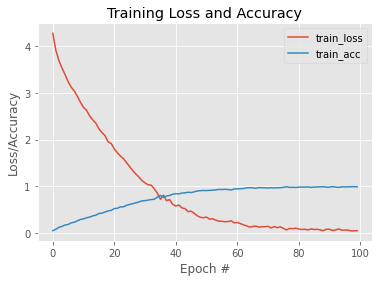

In [ ]:
print('\n Test accuracy')
predictedY = model.predict(testX)
predictedY = predictedY.argmax(axis=1)
# CHANGE OTHER BACK
other = testY.argmax(axis=1)
print(classification_report(other, predictedY))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, maxIt), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, maxIt), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()


Testing Confusion Matrix:



<Figure size 432x288 with 0 Axes>

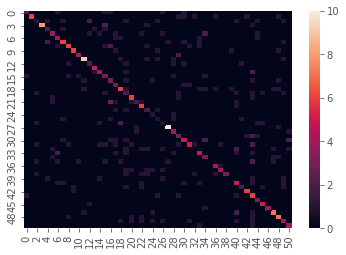

<Figure size 432x288 with 0 Axes>

In [ ]:
from seaborn import heatmap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')
predictedY = predictedY.argmax(axis = 1)
other = testY.argmax(axis = 1)
heatmap(confusion_matrix(other, predictedY))
plt.figure()